# Regression on tabular data

In [2]:
# loading data
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,...,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,...,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,...,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,...,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682,13.687309


In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


In [4]:
df.dtypes

0           int64
1           int64
2           int64
3           int64
4           int64
5           int64
6         float64
7         float64
8           int64
9           int64
10          int64
11          int64
12          int64
13        float64
14        float64
15        float64
16        float64
17        float64
18        float64
19        float64
20        float64
21        float64
22        float64
23        float64
24        float64
25        float64
26        float64
27        float64
28        float64
29        float64
30        float64
31        float64
32        float64
33        float64
34        float64
35        float64
36        float64
37        float64
38        float64
39        float64
40        float64
41        float64
42        float64
43        float64
44        float64
45        float64
46        float64
47        float64
48        float64
49        float64
50        float64
51        float64
52        float64
target    float64
dtype: object

Looks like all feature columns are numeric. Let's check a number of distinct values for integer columns:

In [5]:
int_colnames = df.columns[df.dtypes==np.int64]

print('Number of unique column values for integer columns')
for colname in int_colnames:
    print(f'{colname} : {len(df[colname].unique())}')

Number of unique column values for integer columns
0 : 500
1 : 500
2 : 500
3 : 500
4 : 500
5 : 500
8 : 2
9 : 500
10 : 500
11 : 500
12 : 500


We can see that there is just two values for column 8, let's take a closer look:

In [6]:
set(df['8'])

{0, 1}

Column `8` probably might be converted to categorical, this column should be excluded from feature preparation.

In [7]:
# check for missed values
df.isna().sum().sum()

0

In [8]:
# check for duplicated rows
df.duplicated().sum()

0

In [10]:
# check for duplicated columns
df.T.duplicated().sum()

0

In [13]:
#Correlation matrix between data and target:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,1.000000,0.002009,0.001170,0.002957,-0.003764,-0.007362,0.007855,0.007174,0.008011,0.002339,...,-4.142468e-03,-6.524791e-03,0.003532,0.000310,-0.002639,0.004795,0.000287,-0.001647,-0.003612,0.002427
1,0.002009,1.000000,-0.001849,-0.004653,-0.002433,-0.002037,0.004181,0.005790,0.004095,0.002592,...,-2.874705e-03,-2.679358e-03,0.001402,-0.007900,-0.004497,0.002015,0.003119,0.006038,-0.003173,-0.005545
2,0.001170,-0.001849,1.000000,-0.000775,0.003082,-0.002161,0.002296,-0.000299,0.001983,0.005753,...,1.091757e-03,-5.881274e-04,0.000643,0.003106,0.001611,-0.001444,0.001006,-0.001753,0.002812,0.001003
3,0.002957,-0.004653,-0.000775,1.000000,-0.003623,-0.001038,0.000223,-0.004290,0.000966,0.000202,...,-5.875674e-03,4.776979e-03,0.001334,0.000528,0.006892,0.002790,0.002082,0.000373,0.002534,0.002807
4,-0.003764,-0.002433,0.003082,-0.003623,1.000000,-0.000992,0.005602,-0.004459,0.004763,-0.000778,...,-1.412970e-03,6.178204e-03,-0.000873,-0.002625,-0.001883,0.002884,-0.000702,0.001067,-0.002388,-0.001300
5,-0.007362,-0.002037,-0.002161,-0.001038,-0.000992,1.000000,-0.003869,-0.001455,-0.002289,0.004740,...,-1.159929e-03,-5.225882e-03,-0.000776,-0.000087,-0.004682,0.000988,0.004735,-0.004100,0.004946,-0.002125
6,0.007855,0.004181,0.002296,0.000223,0.005602,-0.003869,1.000000,-0.002051,0.940016,-0.007185,...,5.795666e-04,-3.255019e-05,0.005084,-0.002972,-0.002300,0.003611,0.001542,-0.000944,0.002867,0.000666
7,0.007174,0.005790,-0.000299,-0.004290,-0.004459,-0.001455,-0.002051,1.000000,0.000779,-0.007187,...,-5.102514e-03,2.936529e-03,0.003277,-0.001273,-0.000669,0.001930,0.001085,0.008363,0.001724,0.012103
8,0.008011,0.004095,0.001983,0.000966,0.004763,-0.002289,0.940016,0.000779,1.000000,-0.007370,...,3.567263e-04,-1.795987e-03,0.006837,-0.003748,-0.002903,0.004119,0.000960,0.000786,0.001725,0.000347
9,0.002339,0.002592,0.005753,0.000202,-0.000778,0.004740,-0.007185,-0.007187,-0.007370,1.000000,...,1.202068e-03,1.417241e-03,-0.002239,0.002636,0.004146,0.001255,-0.000016,-0.003785,-0.003467,0.001504


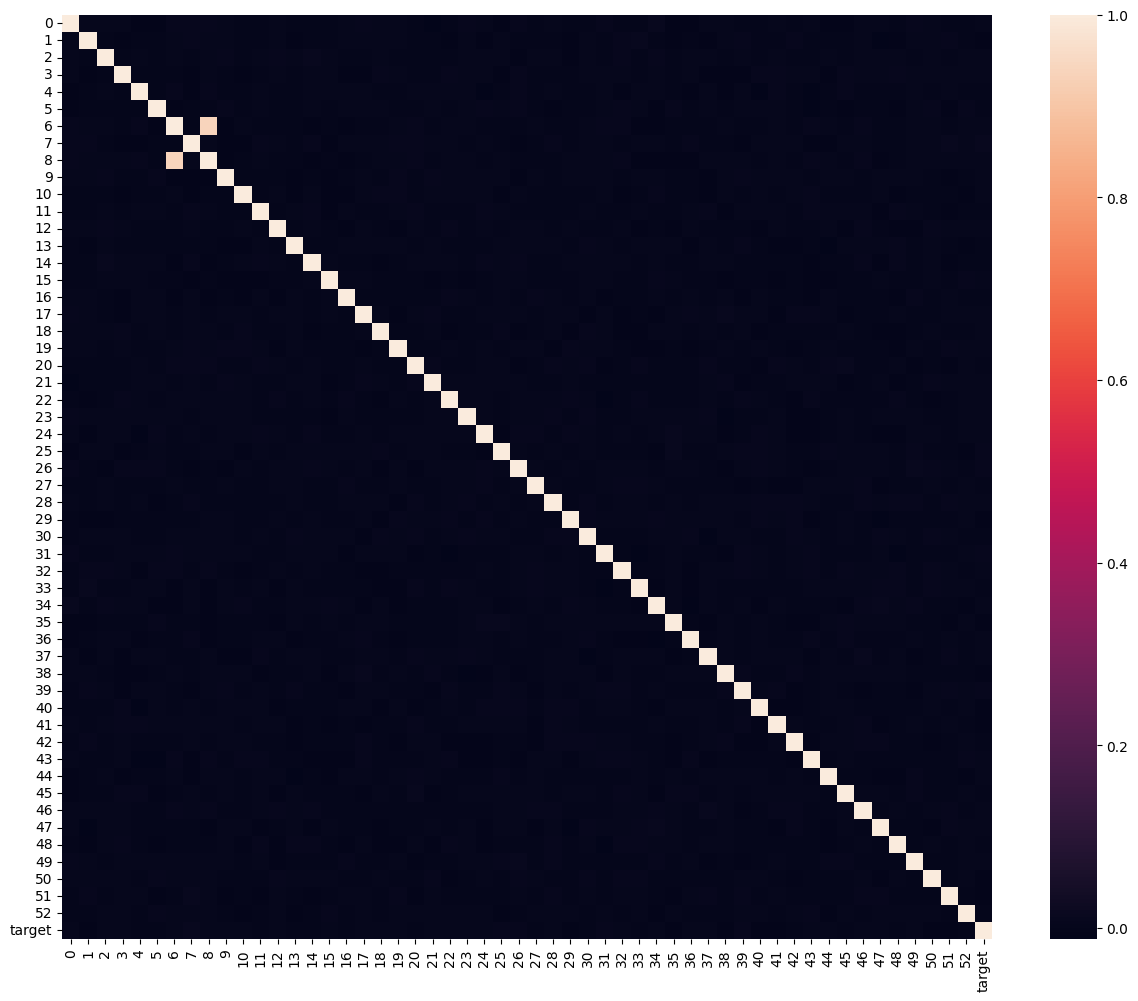

In [14]:
# There are too many features, so more convenient way to check correlations is heatmap 
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(15,12))
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr())
plt.show()

We can see strong positive correlation between features `6` and `8`. Other features and target variable have no significant correlation. Let's take a closer look at features `6` and `8` patterns:

In [15]:
df[['6', '8']].head(20)

,6,8
0,-4.472136,0
1,7.810250,1
2,8.602325,1
3,8.306624,1
4,8.124038,1
5,5.830952,1
6,-1.414214,0
7,-6.324555,0
8,-8.602325,0
9,8.774964,1


Looks like feature `8` is value `0` for negatives `6`, and value `1` for positives. We don't know what should be for zero.
Let's check this hypothesis:

In [16]:
df[(df['6'] > 0) != df['8']][['6', '8']]

,6,8
454,0.0,1
469,0.0,1
481,0.0,1
1049,0.0,1
1096,0.0,1
...,...,...
89465,0.0,1
89606,0.0,1
89784,0.0,1
89890,0.0,1


In [17]:
df[(df['6'] >= 0) != df['8']][['6', '8']]

,6,8
54,-0.0,0
189,-0.0,0
198,-0.0,0
323,-0.0,0
458,-0.0,0
...,...,...
89265,-0.0,0
89402,-0.0,0
89525,-0.0,0
89617,-0.0,0


In [18]:
((df['6'] > 0) == df['8']).sum()

89532

We can see that there is small rounding error, so column `6` +0 and -0 matches different column `8` and generally our hypothesis this is true for this train data. So we can just exclude this column from our model.

And start dataset preparation to the training.

In [19]:
# select target and feature columns
target_column = 'target'
columns_to_exclude = ['8']

feature_columns = df.columns.tolist().remove(target_column)

# train-test split
y = df[target_column]
X = df.drop(columns=[target_column]+columns_to_exclude)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((72000, 52), (18000, 52))

In [20]:
# normalize features
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
normalized_train_X = normalizer.fit_transform(X_train)
normalized_test_X = normalizer.transform(X_test)

In [21]:
from sklearn.metrics import mean_squared_error as rmse

Now that we prepared dataset to the training processes, let's define several regresion models and test them to find the best.

# Testing model architecture

## Linear Models from scikit-learn

In [34]:
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor(loss='squared_error')
sgd_regressor = sgd_regressor.fit(X_train, y_train)

sgd_regressor.score(X_test, y_test)

-9.361076954002498e+24

In [35]:
rmse(sgd_regressor.predict(X_test), y_test)

7.872658441974664e+27

The error from linear model is huge, therefore it either needs some tweaks (like clearing data from outliers or tuning) or the nature of our target is harder to describe using parametric linearity.

We can try to test other models to check their errors and then decide whether it's worth to continue tweaking of this model.

## XGBoost models


In [36]:
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
xgb_regressor = xgb_regressor.fit(X_train, y_train)

xgb_regressor.score(X_test, y_test)

0.9999984310929503

In [37]:
rmse(xgb_regressor.predict(X_test), y_test)

0.0013194496092919013

XGBoost regeression model shows great results on our data with R2 score almost as 1 (the best possible result) and very small root mean square error.


We can also test XGBoost random forest regression model to check whether it has comparible results but current results also allow us to stop experimentation.

In [28]:
from xgboost import XGBRFRegressor

xgbrf_regressor = XGBRFRegressor(objective='reg:squarederror')
xgbrf_regressor = xgbrf_regressor.fit(X_train, y_train)

xgbrf_regressor.score(X_test, y_test)

0.9788489300275676

In [29]:
rmse(xgbrf_regressor.predict(X_test), y_test)

17.78803340614245

XGBoost Random Forest regression model also shows good results. But XGBRegressor is better in this task, so we can proceed with this model.